# Ensemble Learning

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
y_train

array([1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2,
       1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 1, 2, 2, 2, 1, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo = DecisionTreeClassifier(max_depth=3)

In [ ]:
modelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.metrics import classification_report

y_pred = modelo.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.71      0.83         7
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.90      0.91        30
weighted avg       0.95      0.93      0.93        30



## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

modelo = DecisionTreeClassifier()

In [ ]:
cuadricula_parametros = [
    {'min_samples_split': [2, 4, 6, 8, 10],
     'criterion': ["gini", "entropy", "log_loss"]},
    {'max_depth': [2,3,4,5,6],
     'criterion': ["gini", "entropy", "log_loss"]},
    ]

In [ ]:

buscadorCuadricula = GridSearchCV(modelo,cuadricula_parametros,cv=5,scoring="accuracy")



In [ ]:
buscadorCuadricula.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'min_samples_split': [2, 4, 6, 8, 10]},
                         {'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 4, 5, 6]}],
             scoring='accuracy')

In [ ]:
buscadorCuadricula.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [ ]:
modelo = DecisionTreeClassifier(criterion= 'gini',max_depth=2)
modelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

## Visualization

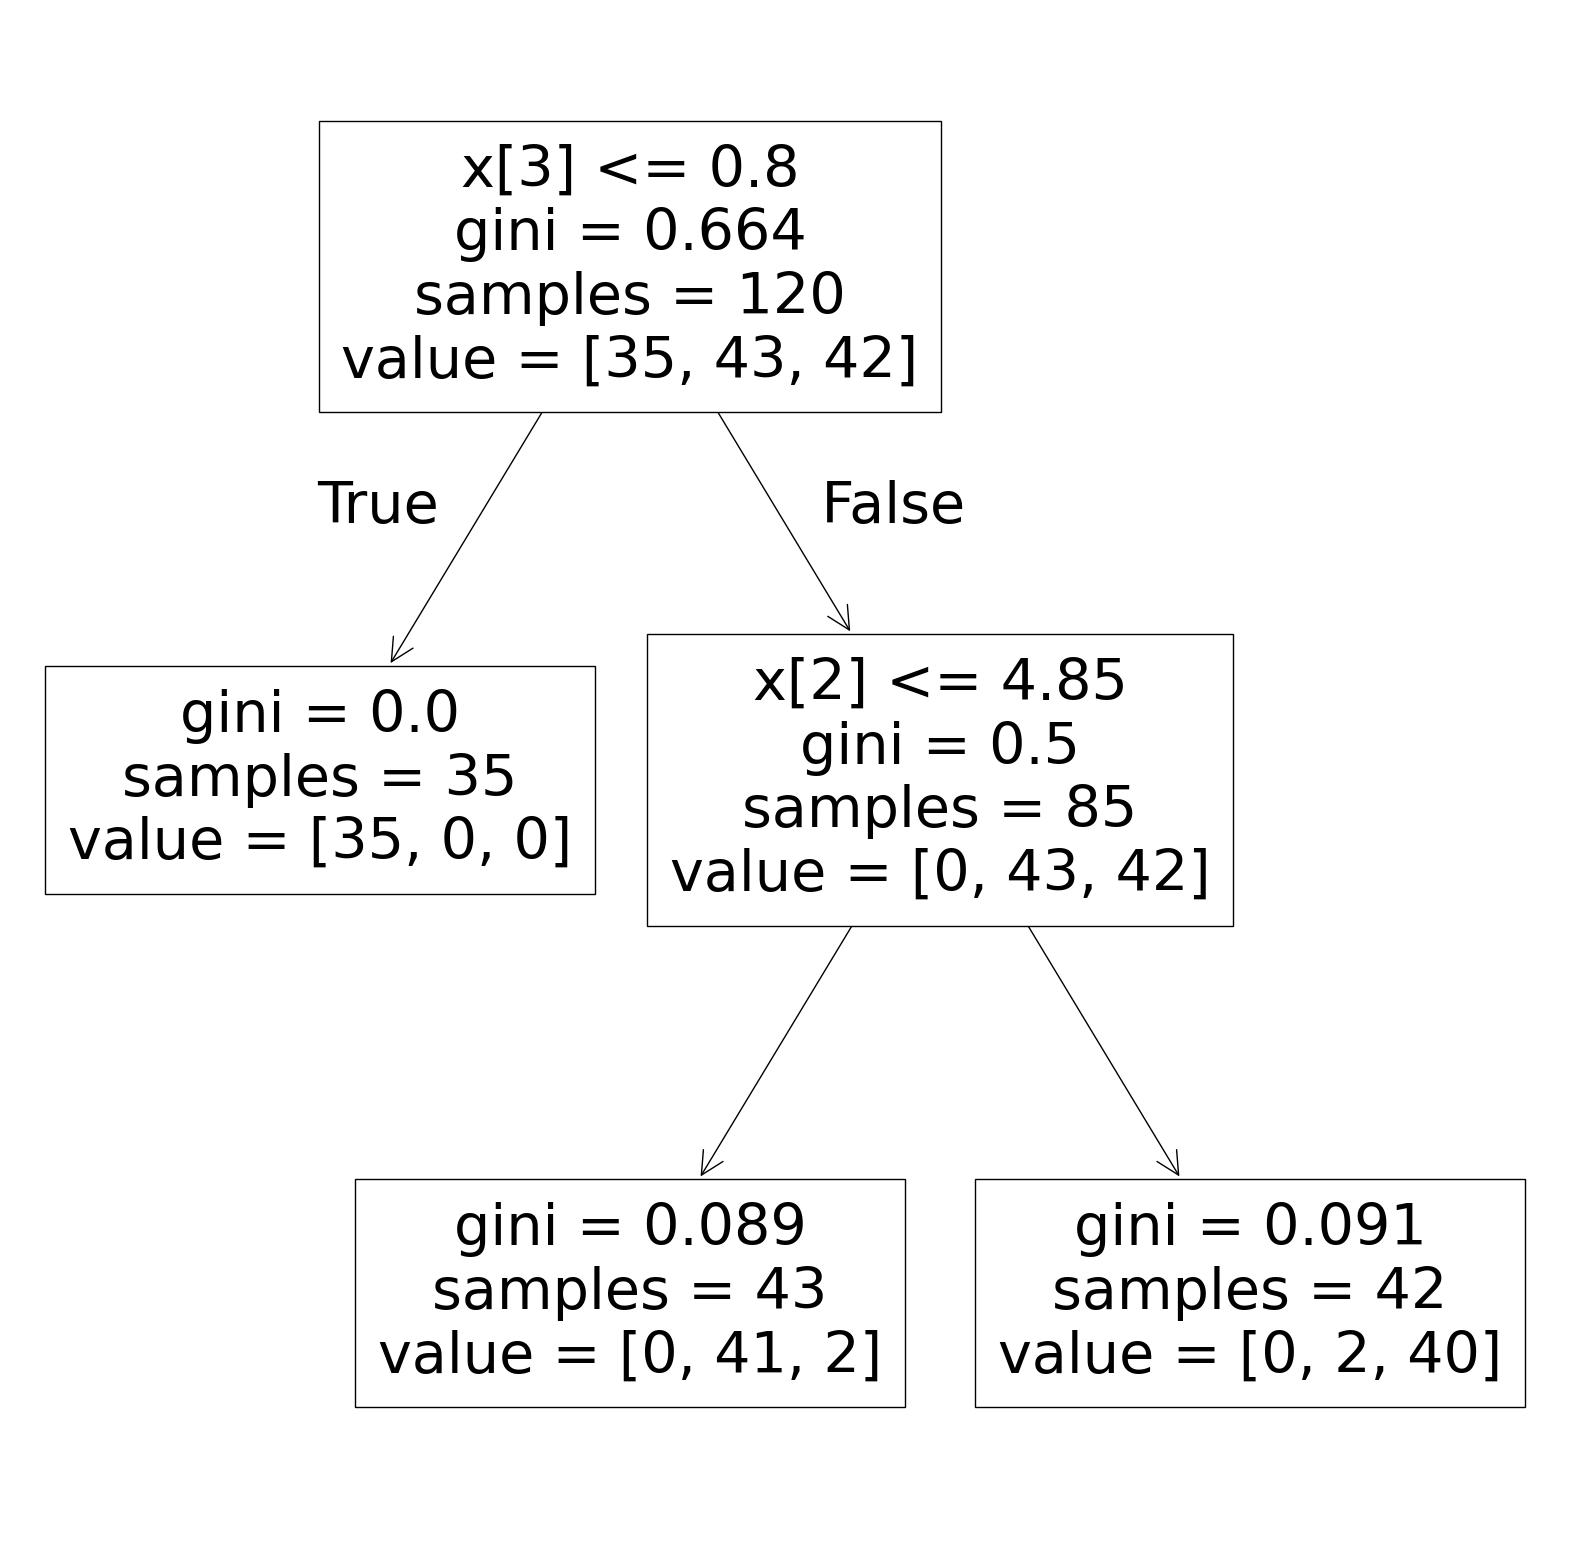

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plot_tree(modelo)
plt.show()

In [ ]:
modelo.feature_importances_

array([0.        , 0.        , 0.48391216, 0.51608784])

### Example

In [ ]:
import pandas as pd

tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/column_3C_weka.csv")
tabla

## Gradient Boosting Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=10)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
gbc.predict(X_test)

array([0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 2, 0])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bosque = RandomForestClassifier(n_estimators=100,max_samples=0.6,max_features=0.8)

In [ ]:
bosque.fit(X_train,y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.6)

In [ ]:
bosque.predict(X_test)

array([0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 1, 0])

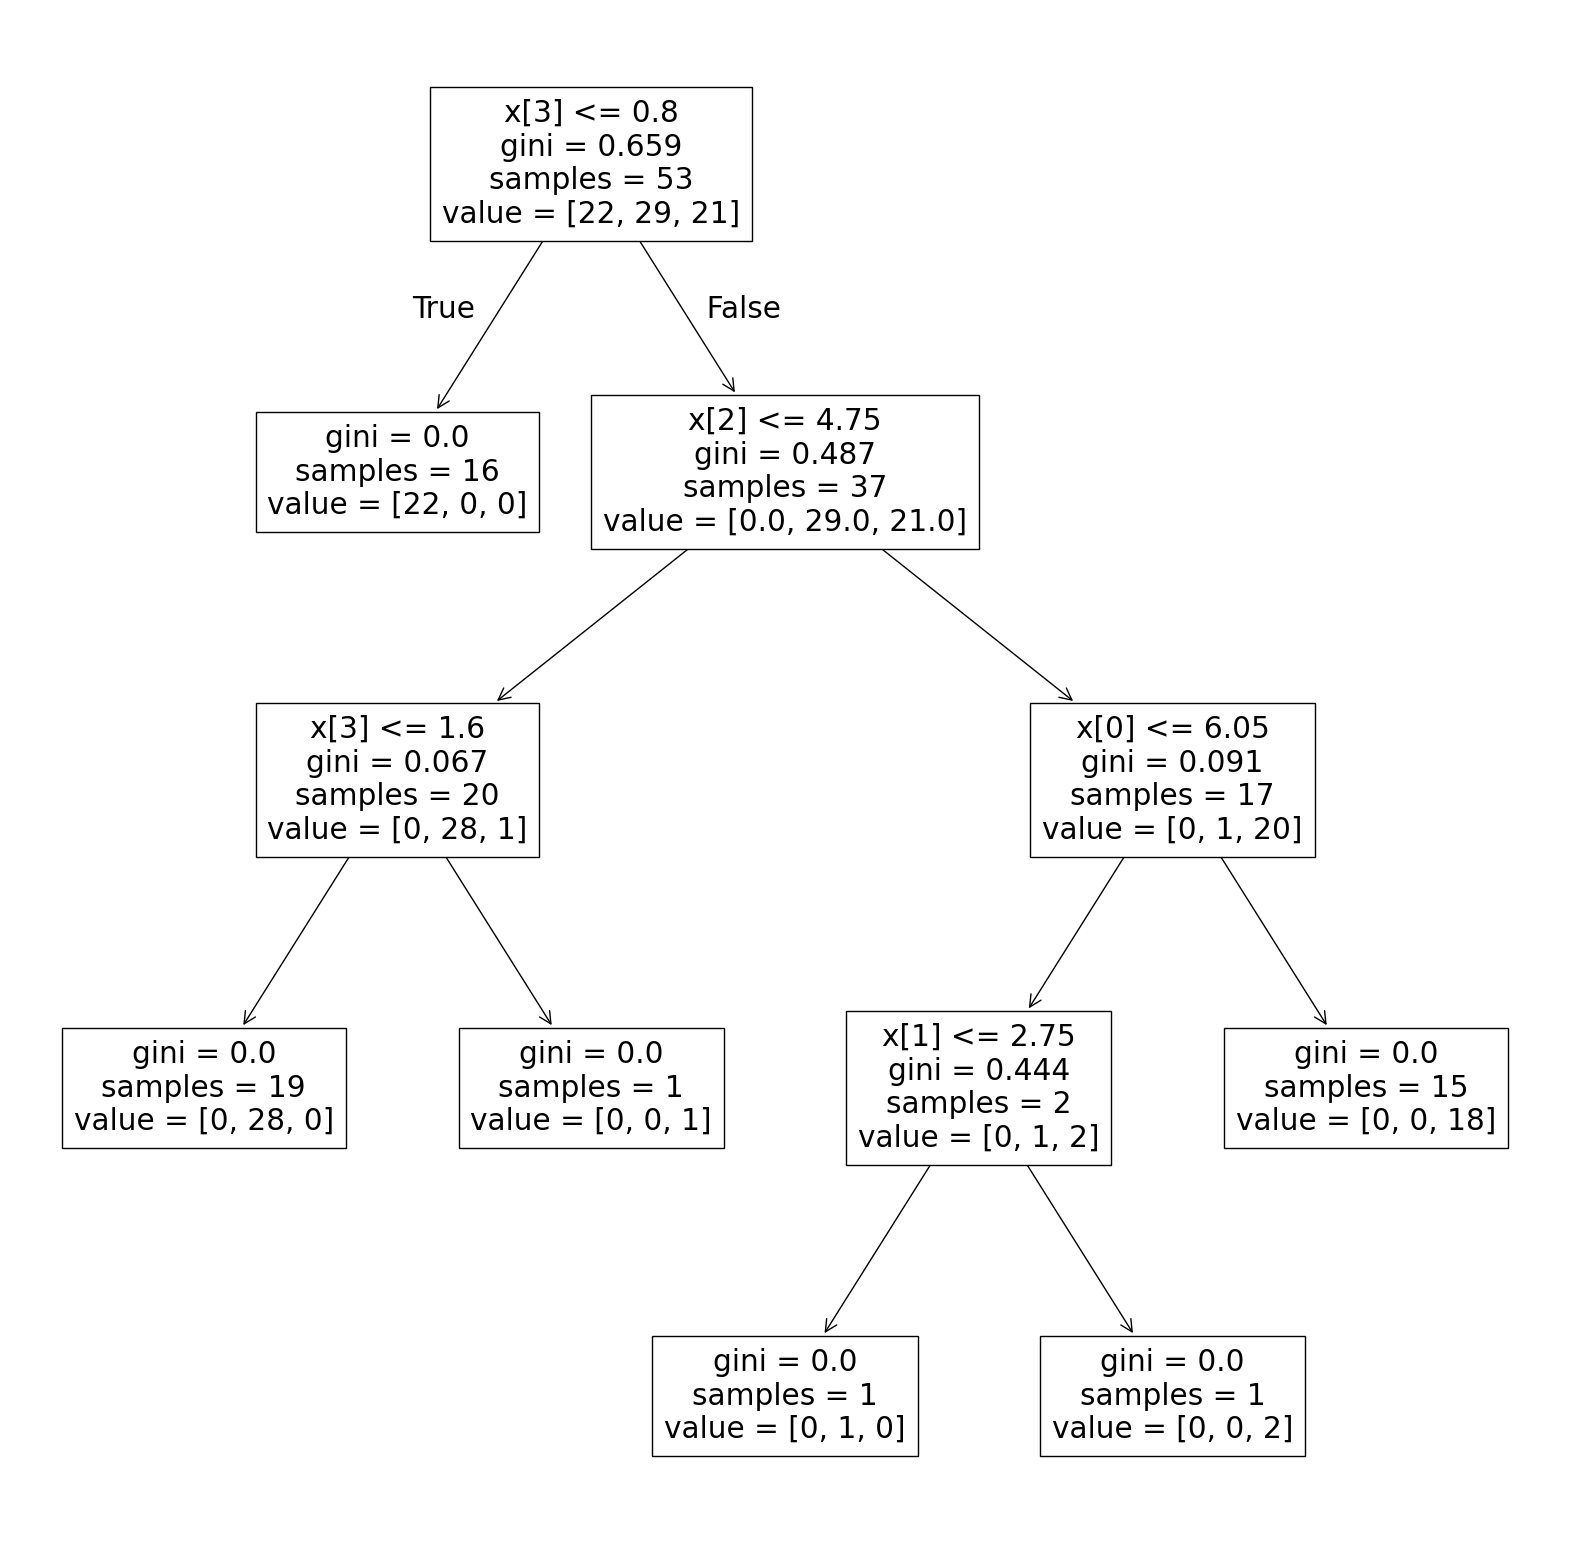

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plot_tree(bosque.estimators_[2])
plt.show()

In [ ]:
bosque.estimators_[2].feature_importances_

array([0.01203711, 0.0280866 , 0.43234133, 0.52753496])

In [ ]:
bosque.feature_importances_

array([0.01853108, 0.01405397, 0.46836652, 0.49904842])

### Example

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"

column_names = [
    "age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_bs", "rest_ecg",
    "max_heart_rate", "exercise_angina", "oldpeak", "slope", "num_vessels", "thal", "target"
]

tabla = pd.read_csv(url, sep=" ", names=column_names)

In [ ]:
tabla

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
codificador = OneHotEncoder()

In [ ]:
codificador.fit(tabla[["target","chest_pain"]])

OneHotEncoder()

In [ ]:
codificador.transform(tabla[["target","chest_pain"]]).toarray()

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.]])

In [ ]:
set(tabla["target"])

{1, 2}